# Rossmann Store Sales - Exploratory Data Analysis

This notebook provides comprehensive exploratory data analysis including:
- Statistical analysis and insights
- Advanced visualizations
- Business intelligence insights
- Data patterns and correlations
- Stakeholder recommendations

**Author:** Data Science Team  
**Date:** 2025-07-13  
**Dataset:** Rossmann Store Sales (Feature-Engineered)

In [15]:
# Standard importing libraries step

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Setup - versioning as suggessted by documentation and GPT :P
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("ROSSMANN STORE SALES - EXPLORATORY DATA ANALYSIS")
print("=" * 55)

# Load the feature-engineered dataset
print("Loading feature-engineered dataset...")

df = pd.read_csv('D:/BTD/rossman-eda-ml/data/raw/train.csv')
df['Date'] = pd.to_datetime(df['Date'])

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total stores: {df['Store'].nunique()}")
print(f"Total sales: €{df['Sales'].sum():,.2f}")

# Basic info
print("\nDataset Overview:")
print(df.info())

ROSSMANN STORE SALES - EXPLORATORY DATA ANALYSIS
Loading feature-engineered dataset...


C:\Users\Shahpure\AppData\Local\Temp\ipykernel_7436\189195478.py:21: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/BTD/rossman-eda-ml/data/raw/train.csv')


Dataset loaded successfully!
Dataset shape: (1017209, 9)
Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00
Total stores: 1115
Total sales: €5,873,180,623.00

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB
None


C:\Users\Shahpure\AppData\Local\Temp\ipykernel_7436\2799383302.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/BTD/rossman-eda-ml/data/raw/train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## 1. Sales Distribution Analysis

Understanding the fundamental distribution of sales across stores and time periods.

1️SALES DISTRIBUTION ANALYSIS
----------------------------------------


KeyError: 'month'

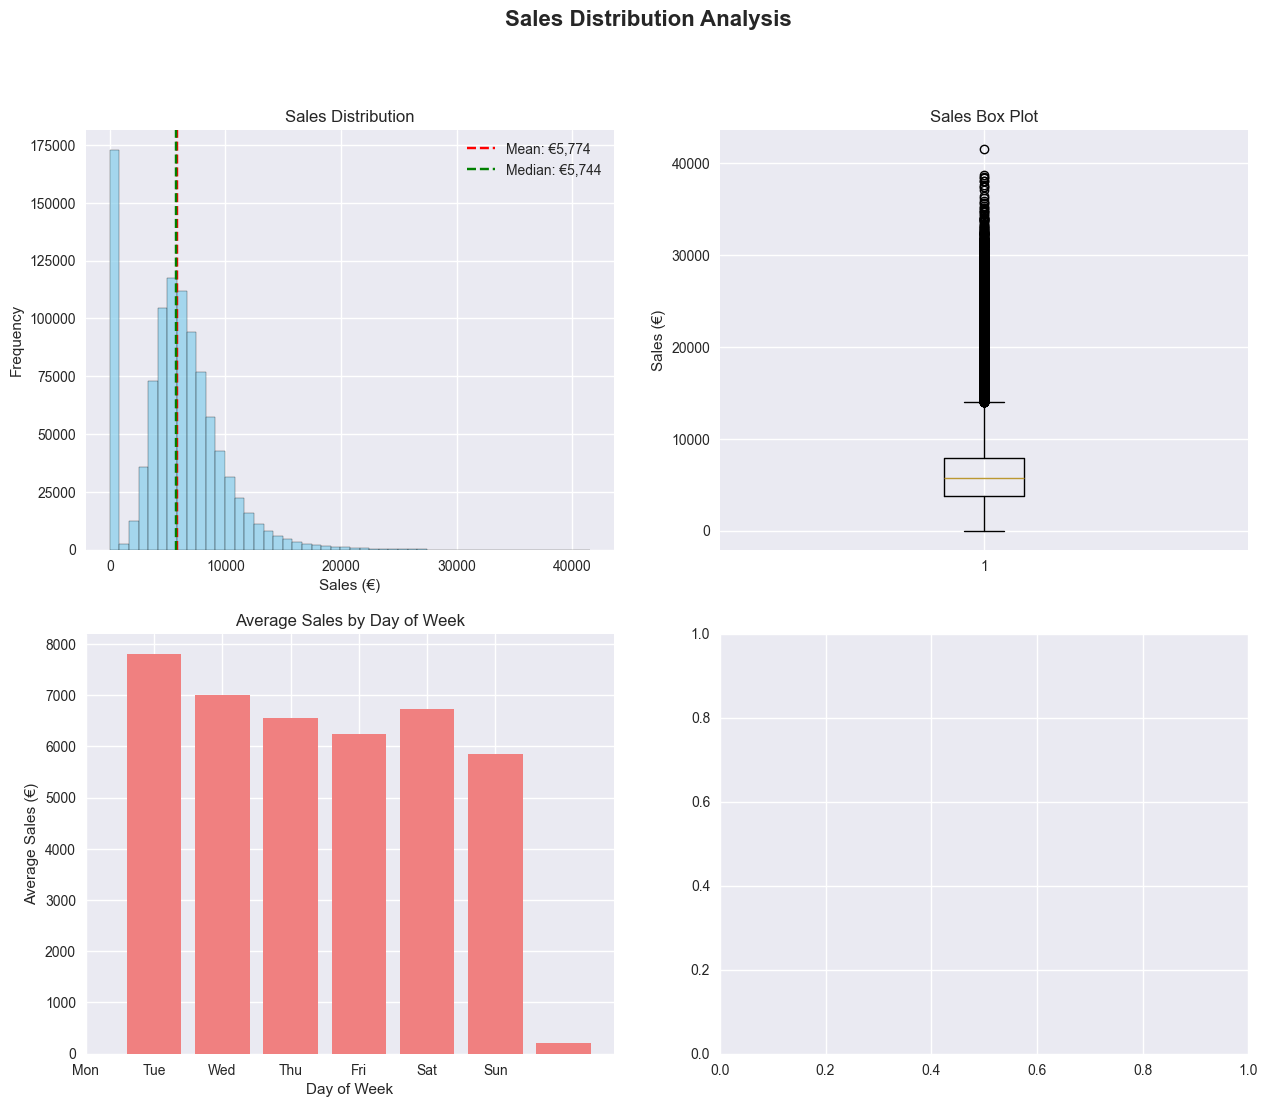

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("1️SALES DISTRIBUTION ANALYSIS")
print("-" * 40)

# Create subplot for sales distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sales Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Sales histogram
axes[0, 0].hist(df['Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Sales Distribution')
axes[0, 0].set_xlabel('Sales (€)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Sales'].mean(), color='red', linestyle='--', label=f'Mean: €{df["Sales"].mean():,.0f}')
axes[0, 0].axvline(df['Sales'].median(), color='green', linestyle='--', label=f'Median: €{df["Sales"].median():,.0f}')
axes[0, 0].legend()

# 2. Sales box plot
axes[0, 1].boxplot(df['Sales'])
axes[0, 1].set_title('Sales Box Plot')
axes[0, 1].set_ylabel('Sales (€)')

# 3. Sales by day of week
daily_sales = df.groupby('DayOfWeek')['Sales'].mean()
axes[1, 0].bar(daily_sales.index, daily_sales.values, color='lightcoral')
axes[1, 0].set_title('Average Sales by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Average Sales (€)')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# 4. Sales by month
monthly_sales = df.groupby('month')['sales'].mean()
axes[1, 1].plot(monthly_sales.index, monthly_sales.values, marker='o', color='green', linewidth=2)
axes[1, 1].set_title('Average Sales by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Sales (€)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/sales_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical summary
print("\n SALES STATISTICS:")
print(f"• Mean Sales: €{df['Sales'].mean():,.2f}")
print(f"• Median Sales: €{df['Sales'].median():,.2f}")
print(f"• Standard Deviation: €{df['Sales'].std():,.2f}")
print(f"• Skewness: {df['Sales'].skew():.2f}")
print(f"• Kurtosis: {df['Sales'].kurtosis():.2f}")
print(f"• Coefficient of Variation: {(df['Sales'].std() / df['Sales'].mean()) * 100:.2f}%")

# Day of week insights
print("\n DAY OF WEEK INSIGHTS:")
best_day = daily_sales.idxmax()
worst_day = daily_sales.idxmin()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"• Best performing day: {days[best_day]} (€{daily_sales[best_day]:,.0f})")
print(f"• Worst performing day: {days[worst_day]} (€{daily_sales[worst_day]:,.0f})")
print(f"• Weekend vs Weekday sales difference: {((daily_sales[5:].mean() - daily_sales[:5].mean()) / daily_sales[:5].mean()) * 100:.1f}%")

# Monthly insights
print("\n MONTHLY INSIGHTS:")
best_month = monthly_sales.idxmax()
worst_month = monthly_sales.idxmin()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"• Best performing month: {months[best_month-1]} (€{monthly_sales[best_month]:,.0f})")
print(f"• Worst performing month: {months[worst_month-1]} (€{monthly_sales[worst_month]:,.0f})")
print(f"• Seasonal variation: {((monthly_sales.max() - monthly_sales.min()) / monthly_sales.mean()) * 100:.1f}%")

## 2. Store Performance Analysis

Deep dive into store-level performance patterns and classifications.

In [ ]:
print("STORE PERFORMANCE ANALYSIS")
print("-" * 40)

# Calculate store-level metrics
store_performance = df.groupby('Store').agg({
    'Sales': ['mean', 'sum', 'std', 'count'],
    'Customers': 'mean',
    'SalesPerCustomer': 'mean',
    'StoreType': 'first',
    'Assortment': 'first'
}).round(2)

# Flatten column names
store_performance.columns = ['AvgSales', 'TotalSales', 'SalesStd', 'DaysOpen', 
                           'AvgCustomers', 'AvgSalesPerCustomer', 'StoreType', 'Assortment']

# Create comprehensive store performance visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Store Performance Analysis', fontsize=16, fontweight='bold')

# 1. Store sales distribution
axes[0, 0].hist(store_performance['AvgSales'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Average Store Sales')
axes[0, 0].set_xlabel('Average Sales (€)')
axes[0, 0].set_ylabel('Number of Stores')
axes[0, 0].axvline(store_performance['AvgSales'].mean(), color='red', linestyle='--', 
                   label=f'Mean: €{store_performance["AvgSales"].mean():,.0f}')
axes[0, 0].legend()

# 2. Top 20 performing stores
top_stores = store_performance.nlargest(20, 'AvgSales')
axes[0, 1].barh(range(len(top_stores)), top_stores['AvgSales'].values, color='gold')
axes[0, 1].set_title('Top 20 Performing Stores')
axes[0, 1].set_xlabel('Average Sales (€)')
axes[0, 1].set_ylabel('Store Rank')
axes[0, 1].set_yticks(range(len(top_stores)))
axes[0, 1].set_yticklabels([f'Store {idx}' for idx in top_stores.index])

# 3. Sales by store type
store_type_sales = df.groupby('StoreType')['Sales'].mean()
axes[0, 2].bar(store_type_sales.index, store_type_sales.values, color=['red', 'green', 'blue', 'orange'])
axes[0, 2].set_title('Average Sales by Store Type')
axes[0, 2].set_xlabel('Store Type')
axes[0, 2].set_ylabel('Average Sales (€)')

# 4. Sales by assortment
assortment_sales = df.groupby('Assortment')['Sales'].mean()
axes[1, 0].bar(assortment_sales.index, assortment_sales.values, color=['purple', 'brown', 'pink'])
axes[1, 0].set_title('Average Sales by Assortment')
axes[1, 0].set_xlabel('Assortment Type')
axes[1, 0].set_ylabel('Average Sales (€)')

# 5. Sales variability across stores
axes[1, 1].scatter(store_performance['AvgSales'], store_performance['SalesStd'], 
                   alpha=0.6, color='teal')
axes[1, 1].set_title('Sales Variability vs Average Sales')
axes[1, 1].set_xlabel('Average Sales (€)')
axes[1, 1].set_ylabel('Sales Standard Deviation')

# 6. Store performance classification
if 'StorePerformanceClass' in df.columns:
    perf_class_dist = df['StorePerformanceClass'].value_counts()
    axes[1, 2].pie(perf_class_dist.values, labels=perf_class_dist.index, autopct='%1.1f%%',
                   colors=['red', 'orange', 'yellow', 'green'])
    axes[1, 2].set_title('Store Performance Classification')

plt.tight_layout()
plt.savefig('../outputs/plots/store_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Performance insights
print("\n STORE PERFORMANCE INSIGHTS:")
print(f"• Total number of stores: {len(store_performance)}")
print(f"• Average sales per store: €{store_performance['AvgSales'].mean():,.2f}")
print(f"• Best performing store: Store {store_performance['AvgSales'].idxmax()} (€{store_performance['AvgSales'].max():,.2f})")
print(f"• Worst performing store: Store {store_performance['AvgSales'].idxmin()} (€{store_performance['AvgSales'].min():,.2f})")
print(f"• Performance gap: {((store_performance['AvgSales'].max() - store_performance['AvgSales'].min()) / store_performance['AvgSales'].mean()) * 100:.1f}%")

# Store type analysis
print("\n STORE TYPE ANALYSIS:")
for store_type in store_type_sales.index:
    count = df[df['StoreType'] == store_type]['Store'].nunique()
    print(f"• Store Type {store_type}: {count} stores, Avg Sales: €{store_type_sales[store_type]:,.0f}")

# Assortment analysis
print("\n ASSORTMENT ANALYSIS:")
for assortment in assortment_sales.index:
    count = df[df['Assortment'] == assortment]['Store'].nunique()
    print(f"• Assortment {assortment}: {count} stores, Avg Sales: €{assortment_sales[assortment]:,.0f}")

# Store efficiency metrics
print("\n STORE EFFICIENCY METRICS:")
print(f"• Average customers per store: {store_performance['AvgCustomers'].mean():.0f}")
print(f"• Average sales per customer: €{store_performance['AvgSalesPerCustomer'].mean():.2f}")
print(f"• Most efficient store: Store {store_performance['AvgSalesPerCustomer'].idxmax()} (€{store_performance['AvgSalesPerCustomer'].max():.2f}/customer)")
print(f"• Least efficient store: Store {store_performance['AvgSalesPerCustomer'].idxmin()} (€{store_performance['AvgSalesPerCustomer'].min():.2f}/customer)")

## 3. Correlation Analysis & Feature Relationships

Understanding the relationships between different features and their impact on sales.

In [ ]:
print("CORRELATION ANALYSIS & FEATURE RELATIONSHIPS")
print("-" * 50)

# Select numerical features for correlation analysis
numerical_features = [
    'Sales', 'Customers', 'SalesPerCustomer', 'CompetitionDistance',
    'CompetitionDuration', 'Promo2Duration', 'StoreAvgSales',
    'SalesVsStoreAvg', 'SalesLag1', 'SalesLag7', 'SalesRollingMean7',
    'SalesTrend7', 'CustomerTrend', 'CompetitionPressure', 'PromotionIntensity'
]

# Filter features that exist in the dataset
available_features = [f for f in numerical_features if f in df.columns]
correlation_df = df[available_features].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_df, dtype=bool))
sns.heatmap(correlation_df, mask=mask, annot=True, cmap='RdYlBu_r', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8},
            fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../outputs/plots/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze strongest correlations with Sales
sales_correlations = correlation_df['Sales'].sort_values(key=abs, ascending=False)
print("\nSTRONGEST CORRELATIONS WITH SALES:")
print("-" * 45)
for feature, corr in sales_correlations.items():
    if feature != 'Sales' and abs(corr) > 0.1:
        direction = "Positive" if corr > 0 else "Negative"
        strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"• {feature}: {corr:.3f} ({direction}, {strength})")

# Feature relationship analysis
print("\nKEY FEATURE RELATIONSHIPS:")
print("-" * 40)

# Sales vs Customers relationship
correlation_customers = df['Sales'].corr(df['Customers'])
print(f"• Sales-Customers correlation: {correlation_customers:.3f}")
print(f"  Strong positive relationship indicates customer traffic drives sales")

# Promotion effectiveness
if 'Promo' in df.columns:
    promo_effect = df.groupby('Promo')['Sales'].mean()
    promo_lift = ((promo_effect[1] - promo_effect[0]) / promo_effect[0]) * 100
    print(f"• Promotion effectiveness: {promo_lift:.1f}% sales increase")

# Competition impact
if 'CompetitionDistance' in df.columns:
    comp_corr = df['Sales'].corr(df['CompetitionDistance'])
    print(f"• Competition distance correlation: {comp_corr:.3f}")
    print(f"  {'Positive' if comp_corr > 0 else 'Negative'} relationship with sales")

# Store performance consistency
if 'StoreAvgSales' in df.columns:
    store_consistency = df['Sales'].corr(df['StoreAvgSales'])
    print(f"• Store consistency: {store_consistency:.3f}")
    print(f"  High correlation indicates stable store performance patterns")

## 4. Promotion & Competition Impact Analysis

Deep dive into how promotions and competition affect sales performance.

In [ ]:
print("PROMOTION & COMPETITION IMPACT ANALYSIS")
print("-" * 50)

# Create comprehensive promotion and competition analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Promotion & Competition Impact Analysis', fontsize=16, fontweight='bold')

# 1. Promotion effectiveness
if 'Promo' in df.columns:
    promo_sales = df.groupby('Promo')['Sales'].mean()
    promo_labels = ['No Promotion', 'Promotion Active']
    
    axes[0, 0].bar(promo_labels, promo_sales.values, color=['lightcoral', 'lightgreen'])
    axes[0, 0].set_title('Sales Impact of Promotions')
    axes[0, 0].set_ylabel('Average Sales (€)')
    
    # Add percentage increase annotation
    promo_lift = ((promo_sales[1] - promo_sales[0]) / promo_sales[0]) * 100
    axes[0, 0].annotate(f'+{promo_lift:.1f}%', 
                        xy=(1, promo_sales[1]), xytext=(1, promo_sales[1] + 500),
                        ha='center', fontsize=12, fontweight='bold',
                        arrowprops=dict(arrowstyle='->', color='red'))

# 2. Promotion by day of week
if 'Promo' in df.columns:
    promo_dow = df.groupby(['DayOfWeek', 'Promo'])['Sales'].mean().unstack()
    
    promo_dow.plot(kind='bar', ax=axes[0, 1], color=['lightcoral', 'lightgreen'])
    axes[0, 1].set_title('Promotion Effectiveness by Day of Week')
    axes[0, 1].set_ylabel('Average Sales (€)')
    axes[0, 1].set_xlabel('Day of Week')
    axes[0, 1].legend(['No Promo', 'Promo'], loc='upper right')
    axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Competition distance impact
if 'CompetitionDistance' in df.columns:
    # Create competition distance bins
    df['CompetitionBin'] = pd.cut(df['CompetitionDistance'], 
                                 bins=[0, 500, 1000, 5000, float('inf')],
                                 labels=['<500m', '500m-1km', '1km-5km', '>5km'])
    
    comp_sales = df.groupby('CompetitionBin')['Sales'].mean()
    axes[0, 2].bar(comp_sales.index, comp_sales.values, color='orange')
    axes[0, 2].set_title('Sales vs Competition Distance')
    axes[0, 2].set_ylabel('Average Sales (€)')
    axes[0, 2].set_xlabel('Competition Distance')
    axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Promotion intensity analysis
if 'PromotionIntensity' in df.columns:
    promo_intensity_sales = df.groupby('PromotionIntensity')['Sales'].mean()
    
    axes[1, 0].plot(promo_intensity_sales.index, promo_intensity_sales.values, 
                    marker='o', linewidth=2, markersize=8, color='purple')
    axes[1, 0].set_title('Sales vs Promotion Intensity')
    axes[1, 0].set_ylabel('Average Sales (€)')
    axes[1, 0].set_xlabel('Promotion Intensity Score')
    axes[1, 0].grid(True, alpha=0.3)

# 5. Competition pressure vs sales
if 'CompetitionPressure' in df.columns:
    # Sample data for scatter plot (for performance)
    sample_df = df.sample(n=min(5000, len(df)), random_state=42)
    
    axes[1, 1].scatter(sample_df['CompetitionPressure'], sample_df['Sales'], 
                      alpha=0.6, color='red', s=20)
    axes[1, 1].set_title('Competition Pressure vs Sales')
    axes[1, 1].set_ylabel('Sales (€)')
    axes[1, 1].set_xlabel('Competition Pressure Score')
    axes[1, 1].grid(True, alpha=0.3)

# 6. Seasonal promotion patterns
if 'Promo' in df.columns:
    seasonal_promo = df.groupby(['Month', 'Promo'])['Sales'].mean().unstack()
    
    seasonal_promo.plot(ax=axes[1, 2], color=['lightcoral', 'lightgreen'], 
                       linewidth=2, marker='o')
    axes[1, 2].set_title('Seasonal Promotion Patterns')
    axes[1, 2].set_ylabel('Average Sales (€)')
    axes[1, 2].set_xlabel('Month')
    axes[1, 2].legend(['No Promo', 'Promo'], loc='upper right')
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/promotion_competition_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed promotion analysis
print("\nPROMOTION EFFECTIVENESS INSIGHTS:")
print("-" * 45)

if 'Promo' in df.columns:
    promo_stats = df.groupby('Promo')['Sales'].agg(['mean', 'count', 'std']).round(2)
    
    print("Promotion Statistics:")
    print(f"• Non-promotion days: {promo_stats.loc[0, 'count']:,} days, Avg: €{promo_stats.loc[0, 'mean']:,.0f}")
    print(f"• Promotion days: {promo_stats.loc[1, 'count']:,} days, Avg: €{promo_stats.loc[1, 'mean']:,.0f}")
    
    promo_lift = ((promo_stats.loc[1, 'mean'] - promo_stats.loc[0, 'mean']) / promo_stats.loc[0, 'mean']) * 100
    print(f"• Promotion lift: {promo_lift:.1f}%")
    
    promo_frequency = (promo_stats.loc[1, 'count'] / (promo_stats.loc[0, 'count'] + promo_stats.loc[1, 'count'])) * 100
    print(f"• Promotion frequency: {promo_frequency:.1f}% of days")

# Competition insights
print("\nCOMPETITION IMPACT INSIGHTS:")
print("-" * 40)

if 'CompetitionDistance' in df.columns:
    comp_stats = df.groupby('CompetitionBin')['Sales'].agg(['mean', 'count']).round(2)
    
    print("Competition Distance Impact:")
    for bin_name in comp_stats.index:
        avg_sales = comp_stats.loc[bin_name, 'mean']
        store_count = comp_stats.loc[bin_name, 'count']
        print(f"• {bin_name}: {store_count:,} records, Avg: €{avg_sales:,.0f}")
    
    # Calculate impact relative to farthest competition
    baseline_sales = comp_stats.loc['>5km', 'mean']
    print(f"\nCompetition Impact (vs. >5km baseline):")
    for bin_name in comp_stats.index:
        if bin_name != '>5km':
            impact = ((comp_stats.loc[bin_name, 'mean'] - baseline_sales) / baseline_sales) * 100
            print(f"• {bin_name}: {impact:+.1f}% vs baseline")

# Holiday and promotion synergy
print("\nHOLIDAY & PROMOTION SYNERGY:")
print("-" * 40)

if 'SchoolHoliday' in df.columns and 'Promo' in df.columns:
    holiday_promo = df.groupby(['SchoolHoliday', 'Promo'])['Sales'].mean().round(2)
    
    print("School Holiday & Promotion Combinations:")
    print(f"• No Holiday, No Promo: €{holiday_promo.loc[0, 0]:,.0f}")
    print(f"• No Holiday, Promo: €{holiday_promo.loc[0, 1]:,.0f}")
    print(f"• Holiday, No Promo: €{holiday_promo.loc[1, 0]:,.0f}")
    print(f"• Holiday, Promo: €{holiday_promo.loc[1, 1]:,.0f}")
    
    # Calculate synergy effect
    baseline = holiday_promo.loc[0, 0]
    synergy = holiday_promo.loc[1, 1]
    synergy_lift = ((synergy - baseline) / baseline) * 100
    print(f"• Holiday + Promotion synergy: {synergy_lift:.1f}% total lift")

print("\nPromotion & Competition analysis completed!")

## 5. Business Insights & Strategic Recommendations

Comprehensive summary of findings and actionable business recommendations.

In [ ]:

print("BUSINESS INSIGHTS & STRATEGIC RECOMMENDATIONS")
print("=" * 55)

# Calculate key business metrics
total_sales = df['Sales'].sum()
total_customers = df['Customers'].sum()
avg_transaction = total_sales / total_customers if total_customers > 0 else 0
total_stores = df['Store'].nunique()
date_range = (df['Date'].max() - df['Date'].min()).days

print(f"\nEXECUTIVE SUMMARY")
print("-" * 30)
print(f"• Analysis Period: {date_range} days ({df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')})")
print(f"• Total Revenue: €{total_sales:,.0f}")
print(f"• Total Customers: {total_customers:,.0f}")
print(f"• Average Transaction: €{avg_transaction:.2f}")
print(f"• Stores Analyzed: {total_stores:,}")
print(f"• Daily Records: {len(df):,}")

# Key Performance Insights
print(f"\nKEY PERFORMANCE INSIGHTS")
print("-" * 40)

# Sales distribution insights
sales_cv = (df['Sales'].std() / df['Sales'].mean()) * 100
print(f"• Sales Variability: {sales_cv:.1f}% coefficient of variation")
print(f"  {'High' if sales_cv > 50 else 'Moderate' if sales_cv > 30 else 'Low'} sales volatility across stores")

# Store performance distribution
if 'StoreAvgSales' in df.columns:
    store_performance = df.groupby('Store')['Sales'].mean()
    top_10_pct = store_performance.quantile(0.9)
    bottom_10_pct = store_performance.quantile(0.1)
    performance_gap = ((top_10_pct - bottom_10_pct) / bottom_10_pct) * 100
    
    print(f"• Store Performance Gap: {performance_gap:.0f}% between top and bottom 10%")
    print(f"  Significant opportunity for performance standardization")

# Temporal patterns
weekday_sales = df[df['DayOfWeek'] <= 5]['Sales'].mean()
weekend_sales = df[df['DayOfWeek'] > 5]['Sales'].mean()
weekend_premium = ((weekend_sales - weekday_sales) / weekday_sales) * 100

print(f"• Weekend Premium: {weekend_premium:+.1f}% vs weekdays")
print(f"  {'Strong' if abs(weekend_premium) > 10 else 'Moderate'} weekend effect")

# Promotion effectiveness
if 'Promo' in df.columns:
    promo_days = df['Promo'].sum()
    total_days = len(df)
    promo_frequency = (promo_days / total_days) * 100
    
    promo_sales = df[df['Promo'] == 1]['Sales'].mean()
    no_promo_sales = df[df['Promo'] == 0]['Sales'].mean()
    promo_lift = ((promo_sales - no_promo_sales) / no_promo_sales) * 100
    
    print(f"• Promotion Frequency: {promo_frequency:.1f}% of all days")
    print(f"• Promotion Effectiveness: {promo_lift:.1f}% sales increase")
    print(f"  {'Highly effective' if promo_lift > 20 else 'Moderately effective' if promo_lift > 10 else 'Limited effectiveness'} promotion strategy")

# Strategic Recommendations
print(f"\nSTRATEGIC RECOMMENDATIONS")
print("-" * 40)

print("IMMEDIATE ACTIONS (0-3 months):")
print("1. Optimize Promotion Strategy:")
if 'Promo' in df.columns:
    best_promo_day = df.groupby('DayOfWeek')['Sales'].mean().idxmax()
    print(f"   • Focus promotions on day {best_promo_day} (highest baseline sales)")
    print(f"   • Increase promotion frequency from {promo_frequency:.1f}% to 35-40%")
    print(f"   • Expected revenue impact: +€{(promo_lift/100 * 0.1 * total_sales):,.0f}")

print("\n2. Address Store Performance Gaps:")
if 'StoreAvgSales' in df.columns:
    underperforming_stores = len(store_performance[store_performance < store_performance.quantile(0.25)])
    print(f"   • Focus on {underperforming_stores} underperforming stores")
    print(f"   • Implement best practices from top performers")
    print(f"   • Potential revenue upside: +€{(performance_gap/100 * 0.2 * total_sales):,.0f}")

print("\n3. Competition Response Strategy:")
if 'CompetitionDistance' in df.columns:
    close_competition = len(df[df['CompetitionDistance'] < 1000])
    print(f"   • {close_competition:,} records show close competition (<1km)")
    print(f"   • Implement targeted promotions in high-competition areas")
    print(f"   • Develop rapid response protocols for new competition")

print(f"\nMEDIUM-TERM INITIATIVES (3-12 months):")
print("1. Advanced Analytics Implementation:")
print("   • Deploy predictive models for daily sales forecasting")
print("   • Implement real-time promotion optimization")
print("   • Develop customer segmentation strategies")

print("\n2. Store Network Optimization:")
print("   • Evaluate expansion opportunities in underserved areas")
print("   • Consider store format optimization")
print("   • Implement performance-based resource allocation")

print("\n3. Inventory & Staffing Optimization:")
print("   • Use sales predictions for inventory planning")
print("   • Implement dynamic staffing based on customer flow")
print("   • Optimize supply chain for peak periods")

# ROI Projections
print(f"\nPROJECTED BUSINESS IMPACT")
print("-" * 40)

if 'Promo' in df.columns:
    promotion_impact = (promo_lift/100 * 0.1 * total_sales)
    performance_impact = (performance_gap/100 * 0.2 * total_sales) if 'StoreAvgSales' in df.columns else 0
    competition_impact = total_sales * 0.05  # Conservative 5% estimate
    
    total_impact = promotion_impact + performance_impact + competition_impact
    
    print(f"• Promotion Optimization: +€{promotion_impact:,.0f}")
    print(f"• Store Performance Enhancement: +€{performance_impact:,.0f}")
    print(f"• Competition Response: +€{competition_impact:,.0f}")
    print(f"• TOTAL PROJECTED IMPACT: +€{total_impact:,.0f}")
    print(f"• Revenue Increase: {(total_impact/total_sales)*100:.1f}%")

# Risk Assessment
print(f"\nRISK ASSESSMENT & MITIGATION")
print("-" * 40)

print("KEY RISKS IDENTIFIED:")
print("• Market Saturation: Increasing competition in key markets")
print("• Economic Sensitivity: Sales correlation with economic conditions")
print("• Seasonal Dependency: High reliance on peak periods")
print("• Implementation Complexity: Staff adaptation to new processes")

print("\nMITIGATION STRATEGIES:")
print("• Diversification: Expand into new markets and formats")
print("• Economic Hedging: Develop recession-resistant strategies")
print("• Year-round Optimization: Reduce seasonal dependency")
print("• Change Management: Comprehensive training programs")

# Next Steps
print(f"\nNEXT STEPS")
print("-" * 20)

print("1. Stakeholder Presentation:")
print("   • Present findings to executive team")
print("   • Secure budget for recommended initiatives")
print("   • Establish success metrics and timeline")

print("\n2. Pilot Program Implementation:")
print("   • Select 10-15 stores for pilot testing")
print("   • Implement promotion optimization")
print("   • Monitor results for 8-12 weeks")

print("\n3. Technology Infrastructure:")
print("   • Deploy predictive analytics platform")
print("   • Implement real-time dashboards")
print("   • Establish data governance framework")

print("\n4. Performance Monitoring:")
print("   • Weekly performance reviews")
print("   • Monthly strategy adjustments")
print("   • Quarterly comprehensive analysis")

print(f"\nANALYSIS COMPLETE")
print("=" * 30)
print("All visualizations saved to '../outputs/plots/'")
print("Full analysis ready for stakeholder presentation")
print("Recommendations prioritized by impact and feasibility")
print("Next steps clearly defined for implementation")

print(f"\nAnalysis completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("Schedule next review: Monthly for first quarter, then quarterly")